Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None

Missing Values:
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


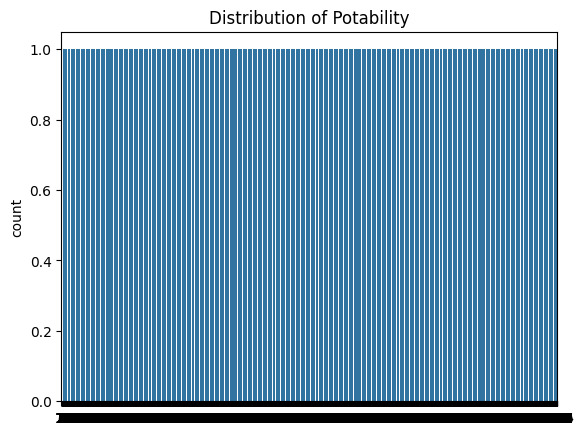

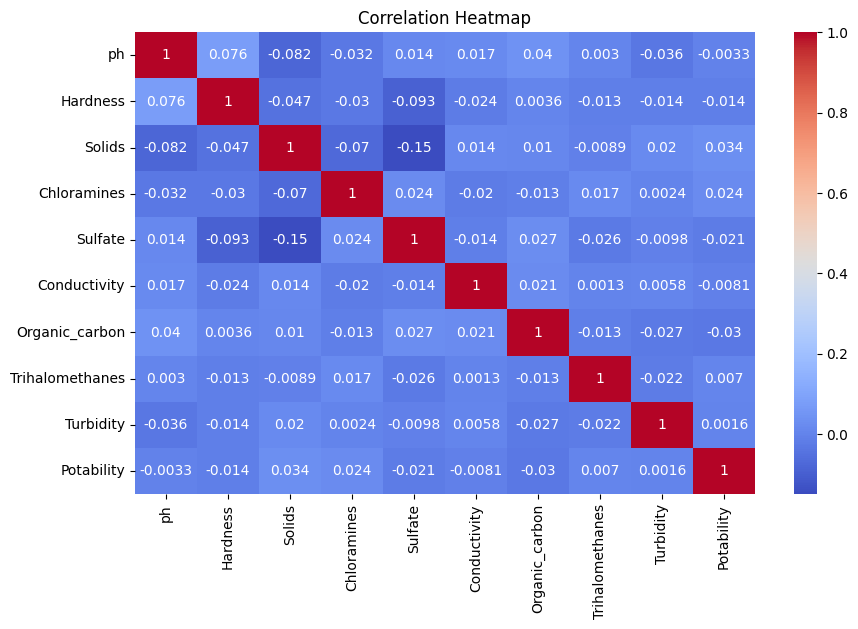

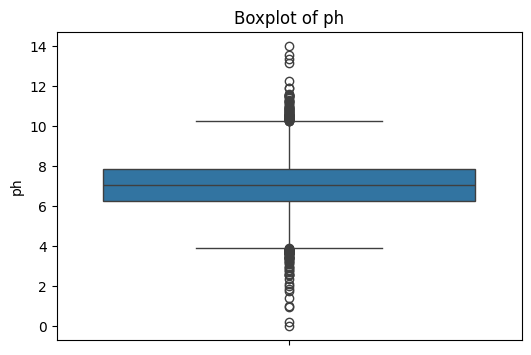

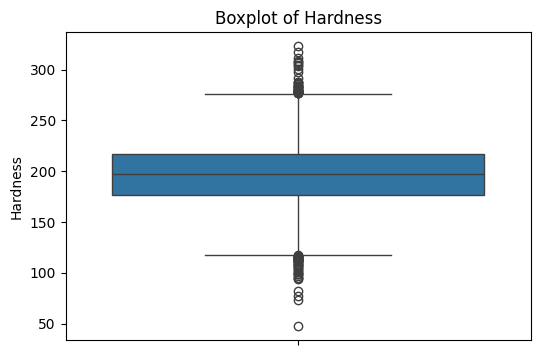

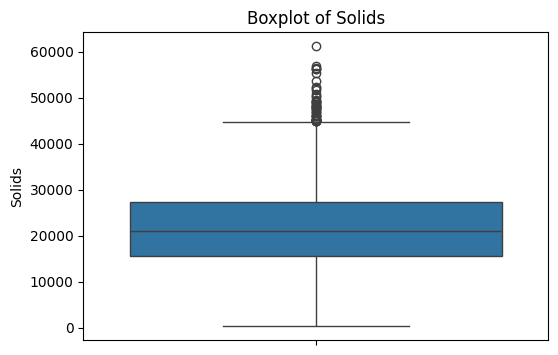

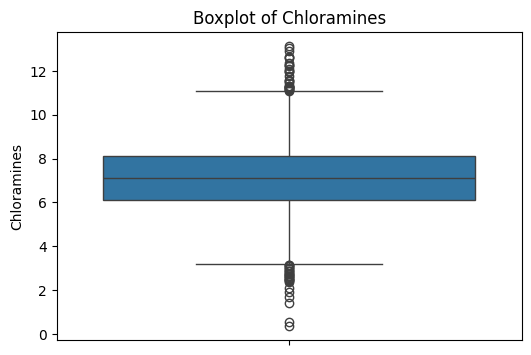

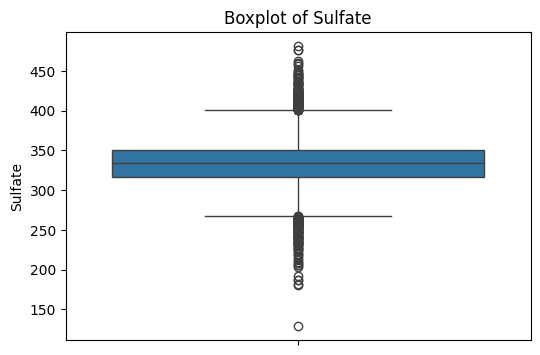

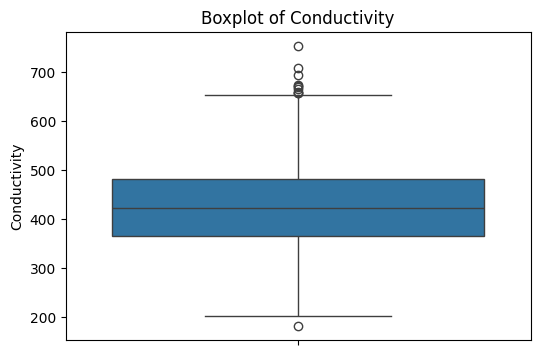

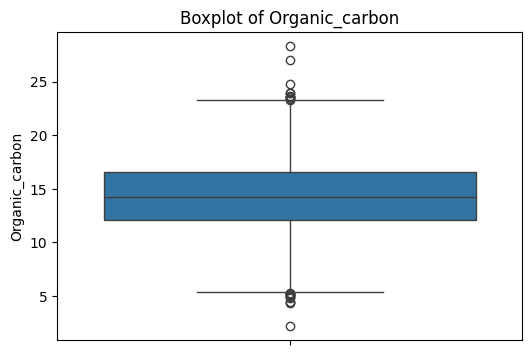

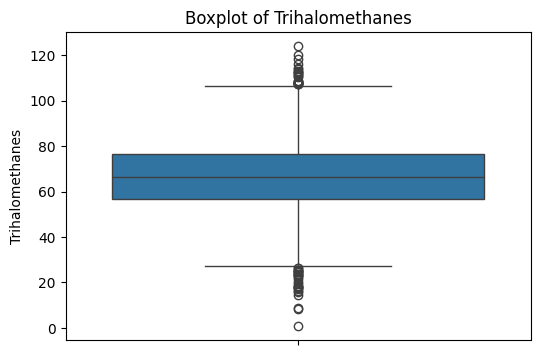

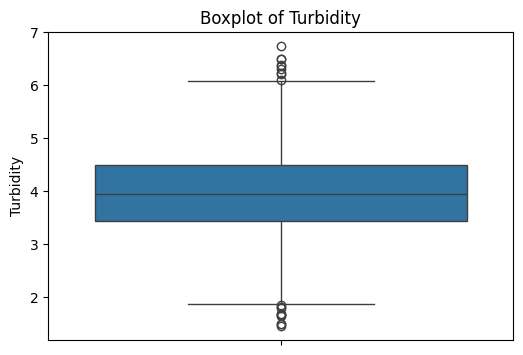


Confusion Matrix:
[[535  65]
 [302  81]]

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.89      0.74       600
           1       0.55      0.21      0.31       383

    accuracy                           0.63       983
   macro avg       0.60      0.55      0.53       983
weighted avg       0.61      0.63      0.57       983


Model and Scaler saved to pickle files.

Example Water Sample Prediction: Not Potable


In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import pickle

file_path = 'water_potability.csv' 
data = pd.read_csv(file_path)

print("Dataset Information:")
print(data.info())

print("\nMissing Values:")
print(data.isnull().sum())

data.fillna(data.mean(), inplace=True)

sns.countplot(data['Potability'])
plt.title("Distribution of Potability")
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

for column in data.columns[:-1]:  # Exclude the target column
    plt.figure(figsize=(6, 4))
    sns.boxplot(data[column])
    plt.title(f"Boxplot of {column}")
    plt.show()

X = data.drop('Potability', axis=1)
y = data['Potability']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

with open('naive_bayes_model.pkl', 'wb') as model_file:
    pickle.dump(nb_model, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("\nModel and Scaler saved to pickle files.")

example_data = {
    'ph': 1.2,
    'Hardness': 150,
    'Solids': 350,
    'Chloramines': 3.0,
    'Sulfate': 250,
    'Conductivity': 400,
    'Organic_carbon': 5.0,
    'Trihalomethanes': 50,
    'Turbidity': 2.0
}

example_df = pd.DataFrame([example_data])

with open('naive_bayes_model.pkl', 'rb') as model_file:
    nb_model_loaded = pickle.load(model_file)

with open('scaler.pkl', 'rb') as scaler_file:
    scaler_loaded = pickle.load(scaler_file)

example_scaled = scaler_loaded.transform(example_df)

example_prediction = nb_model_loaded.predict(example_scaled)

potability = "Potable" if example_prediction[0] == 1 else "Not Potable"
print(f"\nExample Water Sample Prediction: {potability}")


In [41]:
data.head(1)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.99097,2.963135,0


In [42]:
import pickle
import pandas as pd
import numpy as np


with open('naive_bayes_model.pkl', 'rb') as model_file:
    nb_model_loaded = pickle.load(model_file)

with open('scaler.pkl', 'rb') as scaler_file:
    scaler_loaded = pickle.load(scaler_file)


example_data = {
    'ph': 1.2,  
    'Hardness': 150,
    'Solids': 350,
    'Chloramines': 3.0,
    'Sulfate': 250,
    'Conductivity': 400,
    'Organic_carbon': 5.0,
    'Trihalomethanes': 50,
    'Turbidity': 2.0
}


example_df = pd.DataFrame([example_data])


example_scaled = scaler_loaded.transform(example_df)


example_prediction = nb_model_loaded.predict(example_scaled)

potability = "Potable" if example_prediction[0] == 1 else "Not Potable"
print(f"\nExample Water Sample Prediction: {potability}")



Example Water Sample Prediction: Not Potable
